In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
#Loading the dataset using the pandas read_csv method
df = pd.read_csv('raw_fighter_details.csv')

In [22]:
#first ten rows of our dataset
df.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN


In [4]:
#cleaning the dataset
df.dropna(how = 'any', inplace = True)
df['DOB'] = pd.to_datetime(df['DOB'], infer_datetime_format = True )
now = pd.to_datetime('now')
df['Age'] = (now - df['DOB']).astype('<m8[Y]')
df['Age'] = df['Age'].astype(int)

def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_


df["Height"] = df["Height"].apply(lambda x:parse_ht(x))
df["Weight"] = df["Weight"].str.strip(' lbs.')
df["Reach"] = df["Reach"].str.strip('\"')
df[["Weight", "Height", "Reach"]] = df[["Weight", "Height", "Reach"]].apply(pd.to_numeric)





In [24]:
df.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,Age
10,Aaron Phillips,69.0,135,70,Southpaw,1989-08-05,30
11,Aaron Riley,68.0,155,69,Southpaw,1980-12-09,39
12,Aaron Rosa,76.0,205,78,Orthodox,1983-05-28,36
13,Aaron Simpson,72.0,170,73,Orthodox,1974-07-20,45
17,Abdul Razak Alhassan,70.0,170,73,Orthodox,1985-08-11,34


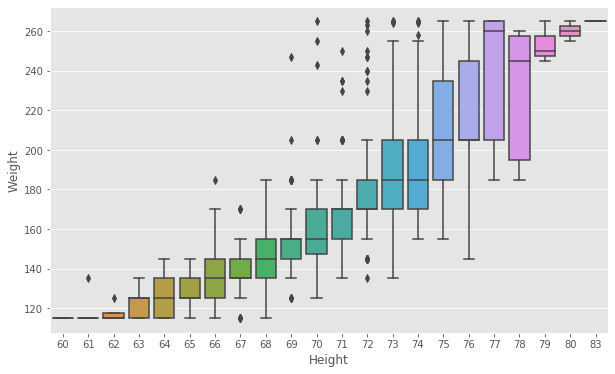

In [79]:
#box plot using seaborn showing height versus weight
df['Height'] = df['Height'].astype(int)
plt.figure(figsize=(10, 6))
sns.boxplot(x ='Height', y = 'Weight', data = df)

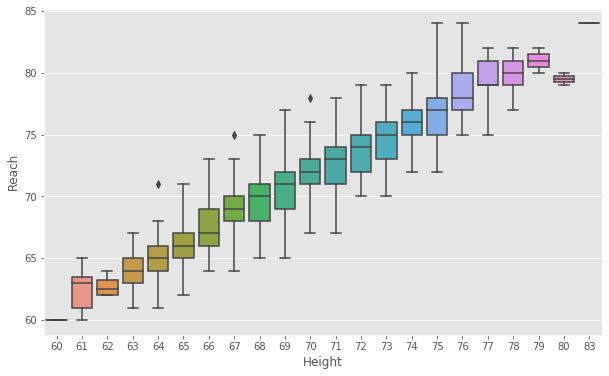

In [81]:
#box plot using seaborn showing height versus reach
plt.figure(figsize=(10, 6))
sns.boxplot(x ='Height', y = 'Reach', data = df, whis = 2)

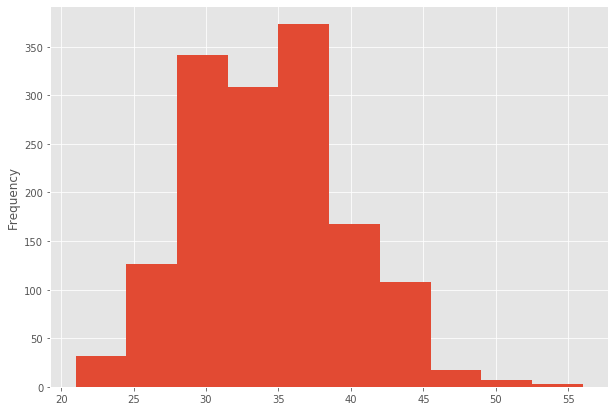

In [77]:
#histogram of ages
df['Age'].plot.hist(figsize = (10,7))

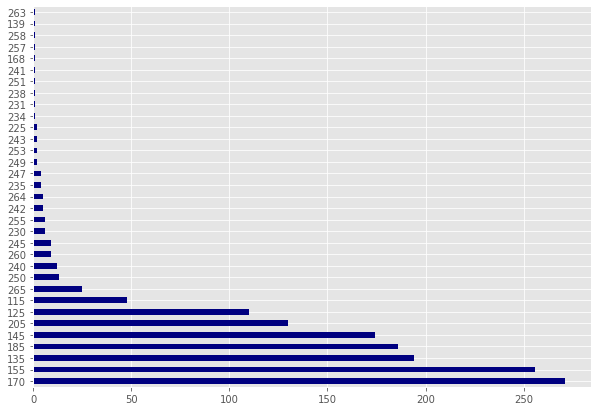

In [82]:
#horizontal bar chart of fighters weight 
pd.value_counts(df['Weight']).plot.barh(figsize = (10, 7), color = 'Navy')

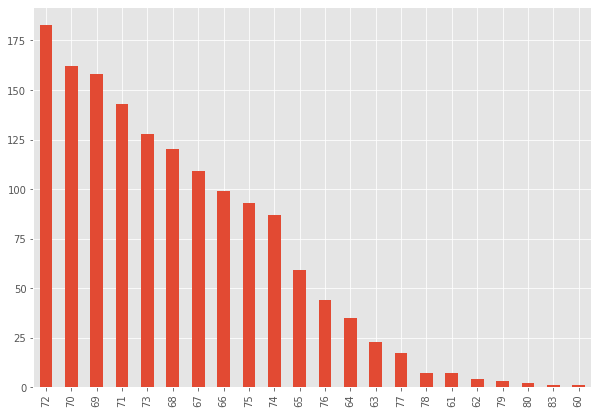

In [83]:
#vertical bar chart of fighters height
pd.value_counts(df['Height']).plot.bar(figsize = (10,7))

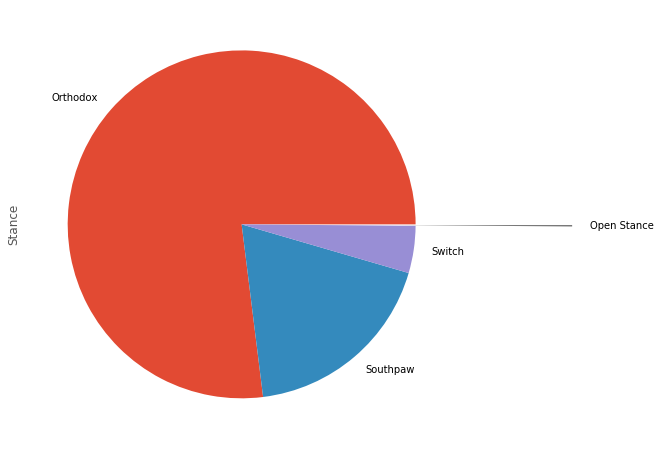

In [5]:
# pie chart showing popularity of stances
pd.value_counts(df['Stance']).plot.pie(explode = (0, 0, 0, 0.9), figsize = (8,8))

## FIGHTER DATA

In [6]:
df1 = pd.read_csv('data.csv')#reading the csv file

In [7]:
df1.fillna(method='ffill') # Filling empty cells
df1.fillna(method='bfill')

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
5,Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,1.0,2.0,0.0,4.0,Orthodox,165.10,167.64,115.0,33.0,28.0
6,Aljamain Sterling,Pedro Munhoz,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3,0.0,...,1.0,3.0,0.0,9.0,Orthodox,170.18,180.34,135.0,32.0,29.0
7,Karolina Kowalkiewicz,Alexa Grasso,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Women's Strawweight,3,1.0,...,0.0,0.0,0.0,5.0,Orthodox,160.02,162.56,115.0,25.0,33.0
8,Ricardo Lamas,Calvin Kattar,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Featherweight,3,0.0,...,4.0,3.0,0.0,10.0,Orthodox,172.72,180.34,145.0,31.0,37.0
9,Yan Xiaonan,Angela Hill,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,...,0.0,0.0,0.0,3.0,Orthodox,165.10,160.02,115.0,34.0,29.0


Text(0.5, 1.0, "Fighter's Reach against Fighter Wins")

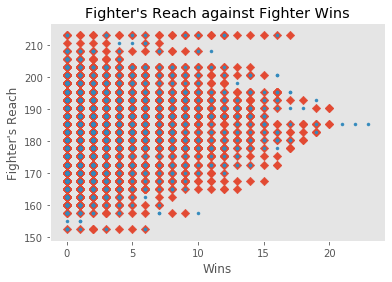

In [9]:
#scatter plot of wins by reach of both R and B fighters
plt.scatter(df1['R_wins'], df1['R_Reach_cms'], label='Red', marker='D')
plt.scatter(df1['B_wins'], df1['B_Reach_cms'], label='Blue', marker='.')
plt.xlabel("Wins")
plt.ylabel("Fighter's Reach")
plt.grid()
plt.title("Fighter's Reach against Fighter Wins")

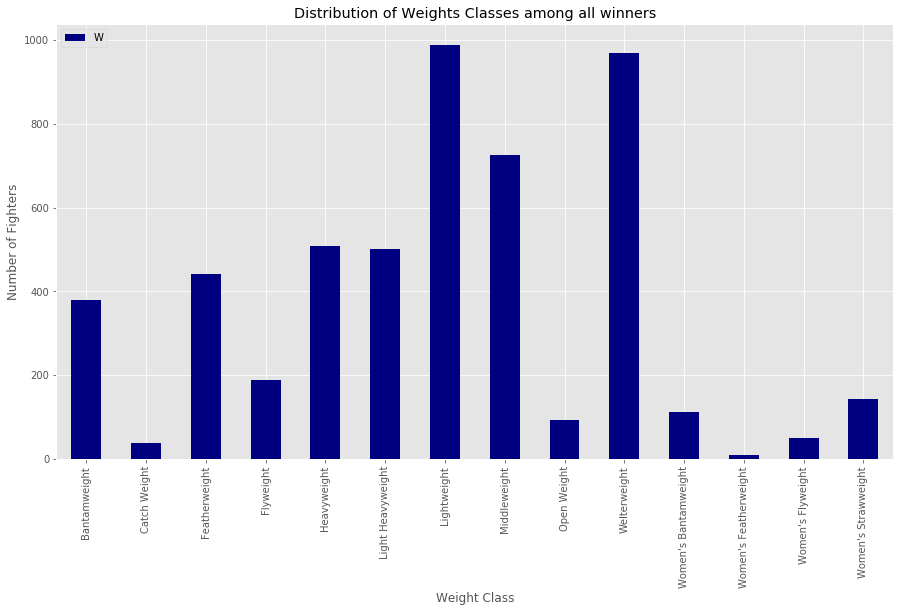

In [11]:
df1_weight_class = pd.DataFrame(df1[['weight_class', 'Winner']])
weight = df1_weight_class.groupby('weight_class').count()
weight.plot(kind = 'bar', figsize = (15, 8), color = 'navy')

plt.title('Distribution of Weights Classes among all winners')
plt.xlabel('Weight Class')
plt.ylabel('Number of Fighters')

plt.legend(labels= 'Winners', loc='upper left') 

plt.show()


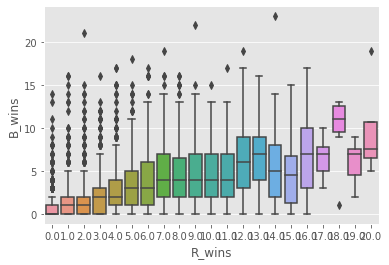

In [19]:
sns.boxplot(x = 'R_wins' , y = 'B_wins' , data = df1)

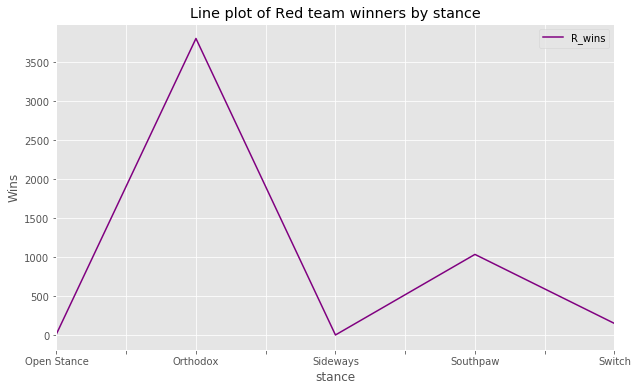

In [60]:
df_WA = df1[['R_wins', 'R_Stance']]
df_WA.groupby('R_Stance').count().plot(kind = 'line', figsize = (10, 6), color = 'Purple')

plt.title('Line plot of Red team winners by stance')
plt.xlabel('stance')
plt.ylabel('Wins')



plt.show()


In [71]:
red_team_streak = df1[['R_current_lose_streak',
 'R_age']]
red_team_streak.columns = ['Current lose streak', 'Current age' ]
red_team_streak.head()

,Current lose streak,Current age
0,0.0,32.0
1,0.0,31.0
2,0.0,35.0
3,1.0,29.0
4,1.0,26.0


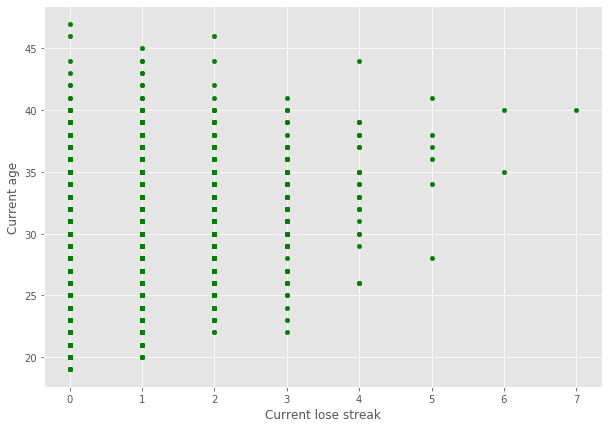

In [78]:
red_team_streak.plot( kind = 'scatter', x = 'Current lose streak', y = 'Current age', figsize = (10, 7), color = 'green')

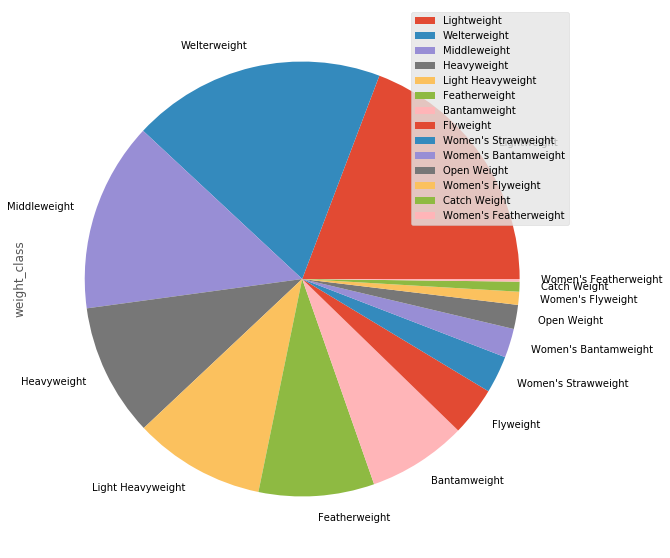

In [9]:
#pie chart showing weight class of fighters
df1['weight_class'].value_counts().plot(kind='pie', figsize=(20,10))
plt.legend()
plt.show()